# NLP Project

The Python code in this notebook describes a Deep Learning-based Natural Language Processing task.

The input file is Herman Melville's `Moby Dick`.

## Step 1: Import `nltk`

Python provides module `nltk` that specializes in Natural Language, with many methods and functions that are required for such tasks.

Subprocesses of this step:
- import `nltk`, download resources
  * The resource here is Project Gutenberg.
  * The text version of the book is downloaded via Terminal as: `curl https://www.gutenberg.org/files/2701/old/2701.txt --output moby-dick.txt`
- install extras for use later

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Open `moby-dick.txt` file using built-in `open()` function, read the file and close it for security (e.g., unintentional data corruption)

In [ ]:
file = open('moby-dick.txt','rt')
text = file.read()
file.close()

Import method `word_tokenize` from submodule `nltk.tokenize` that will turn the original text into tokens. These will be then used for the actual NLP task.

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)

## Bag-of-words

Way of representing text data when modeling text for ML applications.

Encodes text in a format that can be used as input to artificial neural networks.

Describes the occurrence of words within a document.

We either use the `scikit-learn` module, or the `keras` module.

For now we will use them for a small set of text documents to see how these two processes work.

In both cases, we need to train the word encoders on a set of source documents, and then used to encode train/test/validation data in the future.

### Using `scikit-learn`


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Set of small text files
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]

# vectors for each word in every text in the list is created
vectorizer = TfidfVectorizer()

# tokenize
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# encode first document (you can use any of them here)
vector = vectorizer.transform([text[0]])

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


### Using `keras`

In [ ]:
from keras.preprocessing.text import Tokenizer

# create tokenizer
tokenizer = Tokenizer()

# fit on texts
tokenizer.fit_on_texts(text)

# summary of learning process
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

# integer encode docs
encoded_docs = tokenizer.texts_to_matrix(text, mode='count')
print(encoded_docs)

OrderedDict([('the', 4), ('quick', 1), ('brown', 1), ('fox', 2), ('jumped', 1), ('over', 1), ('lazy', 1), ('dog', 2)])
3
{'the': 1, 'fox': 2, 'dog': 3, 'quick': 4, 'brown': 5, 'jumped': 6, 'over': 7, 'lazy': 8}
defaultdict(<class 'int'>, {'fox': 2, 'quick': 1, 'lazy': 1, 'jumped': 1, 'the': 3, 'over': 1, 'brown': 1, 'dog': 2})
[[0. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]]


## Word embeddings

Word representation that allows words with similar meaning to have a similar representation.

Python provides the `Gensim` module to train a word embedding distributed representation.

Because word embeddings work on sentences, we first tokenize the book by sentence; then each sentence is word tokenized and each list is appended to a `sentences_final` list that will be used for the embeddings.


In [ ]:
from nltk.tokenize import sent_tokenize

file = open('moby-dick.txt','rt')
text = file.read()
file.close()

sentences = sent_tokenize(text)

In [ ]:
sentences_final = []
for sentence in sentences:
  sentences_final.append(word_tokenize(sentence))

In [ ]:
from gensim.models import Word2Vec

# train embeddings model
model = Word2Vec(sentences_final, min_count=1)

# summary
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=20796, size=100, alpha=0.025)
['*', 'The', 'Project', 'Gutenberg', 'Etext', 'of', 'Moby', 'Dick', ',', 'by', 'Herman', 'Melville', '#', '3', 'in', 'our', 'series', 'THIS', 'EBOOK', 'WAS', 'ONE', 'OF', 'PROJECT', 'GUTENBERG', "'S", 'EARLY', 'FILES', 'PRODUCED', 'AT', 'A', 'TIME', 'WHEN', 'PROOFING', 'METHODS', 'AND', 'TOOLS', 'WERE', 'NOT', 'WELL', 'DEVELOPED', '.', 'THERE', 'IS', 'AN', 'IMPROVED', 'EDITION', 'IN', 'THE', 'CATALOR', 'Copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', 'be', 'sure', 'to', 'check', 'copyright', 'for', 'your', 'country', 'before', 'posting', 'these', 'files', '!', 'Please', 'take', 'a', 'look', 'at', 'important', 'information', 'this', 'header', 'We', 'encourage', 'you', 'keep', 'file', 'on', 'own', 'disk', 'keeping', 'an', 'electronic', 'path', 'open', 'next', 'readers', 'Do', 'not', 'remove', 'Welcome', 'To', 'World', 'Free', 'Plain', 'Vanilla', 'Electronic', 'Texts', 'Etexts', 'Readable', 'By', 'Both', 'Humans', 'and', '

Next, we plot a projection of the distributed representation of words to observe the model's belief over words relation. 

A common projection technique is the *Principal Component Analysis* (PCA).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


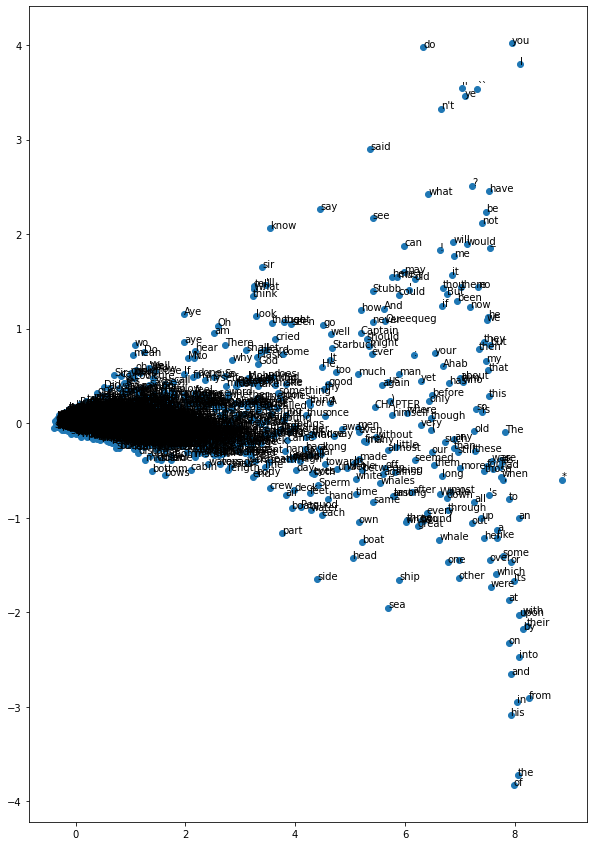

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10, 15)

# fit 2D PCA model to vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# scatter plot for relations of words
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Embedding

Keras offers an Embedding layer that can be used for NNs with text inputs.

Input data has to be integer encoded (each word represented by a unique integer).
- We did that in the form of `Tokenizer` API above.

The `Embedding` Keras layer will learn an embedding of all words in the training set. We need to specify:
- `input_dim`: size of the vocabulary
- `output_dim`: size of the vector space of the embedding
- `input_length` (Optionally): number of words in input sequences.

Can be used as the front-end of a DL model that is able to learn a reach distributed representation of words.
- Representation can be learned as part of the DNN training.

### Document classification

The task will take as inputs 10 one-sentence documents that are classified as positve (1) or negative (0)

In [ ]:
data = {'sentence': ['It is rainy today.',
        'Tomorrow is my first day at the job.',
        'Last week I fell sick.',
        'My favorite team won today.',
        'I ate ice-cream yesterday.',
        'I am going back to work Monday.',
        'COVID-19 pandemic shows signs of weakening.',
        'I do not have any money left on my account.',
        'Groceries are more expensive this year.',
        'I am going on vacation next week'],
        'sentiment': [0,1,0,1,1,0,1,0,0,1]}

import pandas as pd

df = pd.DataFrame(data)

text = [df.iloc[i, 0] for i in range(len(df))]
labels = list(df.iloc[:, 1])

In [ ]:
df

,sentence,sentiment
0,It is rainy today.,0
1,Tomorrow is my first day at the job.,1
2,Last week I fell sick.,0
3,My favorite team won today.,1
4,I ate ice-cream yesterday.,1
5,I am going back to work Monday.,0
6,COVID-19 pandemic shows signs of weakening.,1
7,I do not have any money left on my account.,0
8,Groceries are more expensive this year.,0
9,I am going on vacation next week,1


In [ ]:
from keras.preprocessing.text import Tokenizer

# create tokenizer
tokenizer = Tokenizer()

# fit on texts
tokenizer.fit_on_texts(text)

# summary of learning process
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

# integer encode docs
encoded_docs = tokenizer.texts_to_matrix(text, mode='count')
print(encoded_docs)

OrderedDict([('it', 1), ('is', 2), ('rainy', 1), ('today', 2), ('tomorrow', 1), ('my', 3), ('first', 1), ('day', 1), ('at', 1), ('the', 1), ('job', 1), ('last', 1), ('week', 2), ('i', 5), ('fell', 1), ('sick', 1), ('favorite', 1), ('team', 1), ('won', 1), ('ate', 1), ('ice', 1), ('cream', 1), ('yesterday', 1), ('am', 2), ('going', 2), ('back', 1), ('to', 1), ('work', 1), ('monday', 1), ('covid', 1), ('19', 1), ('pandemic', 1), ('shows', 1), ('signs', 1), ('of', 1), ('weakening', 1), ('do', 1), ('not', 1), ('have', 1), ('any', 1), ('money', 1), ('left', 1), ('on', 2), ('account', 1), ('groceries', 1), ('are', 1), ('more', 1), ('expensive', 1), ('this', 1), ('year', 1), ('vacation', 1), ('next', 1)])
10
{'i': 1, 'my': 2, 'is': 3, 'today': 4, 'week': 5, 'am': 6, 'going': 7, 'on': 8, 'it': 9, 'rainy': 10, 'tomorrow': 11, 'first': 12, 'day': 13, 'at': 14, 'the': 15, 'job': 16, 'last': 17, 'fell': 18, 'sick': 19, 'favorite': 20, 'team': 21, 'won': 22, 'ate': 23, 'ice': 24, 'cream': 25, 'yest

In [ ]:
sentences_final = []
for sentence in text:
  sentences_final.append(word_tokenize(sentence))
sentences_final

[['It', 'is', 'rainy', 'today', '.'],
 ['Tomorrow', 'is', 'my', 'first', 'day', 'at', 'the', 'job', '.'],
 ['Last', 'week', 'I', 'fell', 'sick', '.'],
 ['My', 'favorite', 'team', 'won', 'today', '.'],
 ['I', 'ate', 'ice-cream', 'yesterday', '.'],
 ['I', 'am', 'going', 'back', 'to', 'work', 'Monday', '.'],
 ['COVID-19', 'pandemic', 'shows', 'signs', 'of', 'weakening', '.'],
 ['I',
  'do',
  'not',
  'have',
  'any',
  'money',
  'left',
  'on',
  'my',
  'account',
  '.'],
 ['Groceries', 'are', 'more', 'expensive', 'this', 'year', '.'],
 ['I', 'am', 'going', 'on', 'vacation', 'next', 'week']]

In [ ]:
from gensim.models import Word2Vec

# train embeddings model
model = Word2Vec(sentences_final, min_count=1)

# summary
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=52, size=100, alpha=0.025)
['It', 'is', 'rainy', 'today', '.', 'Tomorrow', 'my', 'first', 'day', 'at', 'the', 'job', 'Last', 'week', 'I', 'fell', 'sick', 'My', 'favorite', 'team', 'won', 'ate', 'ice-cream', 'yesterday', 'am', 'going', 'back', 'to', 'work', 'Monday', 'COVID-19', 'pandemic', 'shows', 'signs', 'of', 'weakening', 'do', 'not', 'have', 'any', 'money', 'left', 'on', 'account', 'Groceries', 'are', 'more', 'expensive', 'this', 'year', 'vacation', 'next']


In [ ]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding

# define the model
max_len = 100
vocab_size = len(words)

# padding all sequences to become equal to length
X = pad_sequences(encoded_docs, maxlen=max_len)

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 8)            416       
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1)                 801       
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, df['sentiment'].values, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 16ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6895 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6887 - accuracy: 0.6000
Epoch 9/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6878 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6868 - accuracy: 0.9000
Epoch 11/20
1/1 [============

## Sentiment analysis with NLP and CNNs

Document classification is among the most common sentiment analysis tasks in NLP.

The main tools used are word embedding and CNNs:
- Word embedding is used for representing words
- CNNs are used for discriminating documents on classification tasks

The framework is comprised of three steps:
1. Word Embeddings Model
2. Convolutional Model
3. Fully-Connected Model

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

# CNN + FC layers model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          5200      
                                                                 
 conv1d (Conv1D)             (None, 93, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 46, 32)           0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1472)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                14730     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                      

# Real-world case: Movie Review dataset

Data used: Imdb movie reviews

Collection of movie reviews retrieved from the imdb.com website in the early 2000s by Bo Pang and Lillian Lee.

We will use only few of them (total size of dataset
: 1,000 positive and 1,000 negative reviews)
- 20 positive, 20 negative

In [81]:
import os

os.chdir('/content')

os.listdir()

['.config', 'pos', '.ipynb_checkpoints', 'sample_data', 'neg']

In [82]:
path_neg = '/content/neg'
path_pos = '/content/pos'

os.chdir(path_neg)

In [83]:
def read_files(file_path):
  with open(file_path, 'r') as f:
    return f.read()

In [84]:
d = {'review':[],
     'sentiment':[]}

reviews = []
sentiments = []
for file in os.listdir():
  if file.endswith('.txt'):
    file_path = f"{path_neg}/{file}"
    reviews.append(read_files(file_path))
    sentiments.append(0)

In [85]:
os.chdir(path_pos)

for file in os.listdir():
  if file.endswith('.txt'):
    file_path = f"{path_pos}/{file}"
    reviews.append(read_files(file_path))
    sentiments.append(1)

In [86]:
d['review'] = reviews
d['sentiment'] = sentiments

In [87]:
import pandas as pd

df = pd.DataFrame(d)
df.head()

,review,sentiment
0,"she was the femme in "" la femme nikita . "" \nh...",0
1,best remembered for his understated performanc...,0
2,mighty joe young blunders about for nearly twe...,0
3,call it a road trip for the walking wounded . ...,0
4,and now the high-flying hong kong style of fil...,0


In [88]:
df = df.sample(frac=1).reset_index()
df = df.drop('index', axis=1)
df.head()

,review,sentiment
0,""" jaws "" is a rare film that grabs your atten...",1
1,"on june 30 , 1960 , a self-taught , idealistic...",1
2,"after watching "" rat race "" last week , i noti...",1
3,that's exactly how long the movie felt to me ....,0
4,carry on matron is the last great carry-on fil...,1


In [89]:
text = [df.iloc[i, 0] for i in range(len(df))]
labels = list(df.iloc[:, 1])

In [90]:
from keras.preprocessing.text import Tokenizer

# create tokenizer
tokenizer = Tokenizer()

# fit on texts
tokenizer.fit_on_texts(text)

# summary of learning process
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

# integer encode docs
encoded_docs = tokenizer.texts_to_matrix(text, mode='count')
print(encoded_docs)

OrderedDict([('jaws', 8), ('is', 396), ('a', 718), ('rare', 2), ('film', 142), ('that', 269), ('grabs', 2), ('your', 21), ('attention', 6), ('before', 19), ('it', 215), ('shows', 10), ('you', 82), ('single', 5), ('image', 9), ('on', 136), ('screen', 11), ('the', 1341), ('movie', 130), ('opens', 4), ('with', 205), ('blackness', 1), ('and', 661), ('only', 52), ('distant', 1), ('alien', 4), ('like', 89), ('underwater', 3), ('sounds', 2), ('then', 25), ('comes', 17), ('first', 47), ('ominous', 1), ('bars', 1), ('of', 619), ('composer', 1), ('john', 18), ("williams'", 2), ('now', 23), ('infamous', 1), ('score', 8), ('dah', 1), ('dum', 1), ('from', 121), ('there', 56), ('director', 14), ('steven', 3), ('spielberg', 8), ('wastes', 2), ('no', 34), ('time', 47), ('taking', 9), ('us', 27), ('into', 64), ('water', 3), ('midnight', 7), ('swim', 1), ('beautiful', 3), ('girl', 4), ('turns', 6), ('deadly', 1), ('right', 19), ('away', 8), ('he', 123), ('lets', 3), ('know', 33), ('how', 28), ('vulnerab

In [91]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


sentences_final = []
for sentence in text:
  sentences_final.append(word_tokenize(sentence))
len(sentences_final)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


39

In [92]:
from gensim.models import Word2Vec

# train embeddings model
model = Word2Vec(sentences_final, min_count=1)

# summary
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=5310, size=100, alpha=0.025)
['``', 'jaws', 'is', 'a', 'rare', 'film', 'that', 'grabs', 'your', 'attention', 'before', 'it', 'shows', 'you', 'single', 'image', 'on', 'screen', '.', 'the', 'movie', 'opens', 'with', 'blackness', ',', 'and', 'only', 'distant', 'alien-like', 'underwater', 'sounds', 'then', 'comes', 'first', 'ominous', 'bars', 'of', 'composer', 'john', 'williams', "'", 'now', 'infamous', 'score', 'dah-dum', 'from', 'there', 'director', 'steven', 'spielberg', 'wastes', 'no', 'time', 'taking', 'us', 'into', 'water', 'midnight', 'swim', 'beautiful', 'girl', 'turns', 'deadly', 'right', 'away', 'he', 'lets', 'know', 'how', 'vulnerable', 'we', 'all', 'are', 'floating', 'in', 'ocean', 'once', 'has', 'attacked', 'never', 'relinquishes', 'its', 'grip', 'perhaps', 'what', 'most', 'outstanding', 'about', 'builds', 'works', 'like', 'theatrical', 'production', 'act', 'second', 'unlike', 'so', 'many', 'modern', 'filmmakers', 'great', 'deal', 'restraint', 'refuses', 'to', '

In [93]:
encoded_docs.shape

(39, 5351)

In [94]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding

# define the model
max_len = 6000
vocab_size = len(words)

# padding all sequences to become equal to length
X = pad_sequences(encoded_docs, maxlen=max_len)
y = df['sentiment'].values

In [95]:
from keras.layers import Conv1D, MaxPooling1D

# CNN + FC layers model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 6000, 100)         531000    
                                                                 
 conv1d_3 (Conv1D)           (None, 5993, 32)          25632     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2996, 32)         0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 95872)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                958730    
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                      

Split into train and test sets:

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [109]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6918 - accuracy: 0.5161
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.8389 - accuracy: 0.5161
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.6640 - accuracy: 0.9677
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.6905 - accuracy: 0.4839
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.6682 - accuracy: 0.5806
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.6058 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.5448 - accuracy: 0.7097
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 0.4991 - accuracy: 0.7742
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.4321 - accuracy: 0.8710
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 0.3522 - accuracy: 0.9677
Epoch 11/20
1/1 [==============================] 

### Evaluate on the test set

In [110]:
y_hat = model.predict(X_test)
y_hat

1/1 [==============================] - 0s 274ms/step


array([[0.42144734],
       [0.89172083],
       [0.53072345],
       [0.8599429 ],
       [0.9087181 ],
       [0.4557282 ],
       [0.30116257],
       [0.6625891 ]], dtype=float32)

In [117]:
y_hat = [0 if y_hat.flatten()[i] < 0.5 else 1 for i in range(len(y_hat.flatten()))]

In [118]:
y_hat

[0, 1, 1, 1, 1, 0, 0, 1]

In [119]:
y_test

array([0, 1, 1, 1, 1, 0, 0, 0])

In [121]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(y_test, y_hat)